In [93]:
# import packages
import numpy as np # numpy allows us to structure data in two-dimensional arrays
import pandas as pd # pandas provides indexing structure and data manipulation functionality on top of numpy arrays
import matplotlib.pyplot as plt # matplotlib is a plotting package
%matplotlib inline 
# configures iPython to show plots in the notebook

## 4. Basic Pandas concepts

Pandas stands for “Python Data Analysis Library”. It is a high-level data manipulation tool developed by Wes McKinney. It is built on the Numpy package and its key data structure is called the DataFrame. DataFrames allow you to store and manipulate tabular data in rows of observations and columns of variables.

### 4.1 Pandas Series
A Series is the foundational data structure of Pandas. It contains two types of information: index and values. Indexes identify the position of the values within the Series. The default index is `[0,1,2,3....n]`.

The code below creates a Series with the values `"a","b","c"`. No index is assigned so the default `[0,1,2]` is used.

In [94]:
basic_series = pd.Series(["a","b","c"])
basic_series

0    a
1    b
2    c
dtype: object

To retrieve a certain value, specify the index.

In [95]:
basic_series[0]

'a'

### 4.2 Pandas DataFrame
A Pandas DataFrame (df) is multiple Series combined together with a common index. The individual Series are called columns. 

Data types can be mixed across the columns of a df, but we recommend keeping the same datatype *within* a column e.g. all numeric floats or all strings. If you have a background in relational data, you likely think this way already.

There are a few different ways to create a df from scratch. The code below uses a dictionary. Each key in the dictionary `("Instructors", "Heights", "Locations")` becomes a column name and the values from each key are the values of the respective columns. No index is specified so the default `[0,1,2]` is used.

In [96]:
sample_df = pd.DataFrame({"Instructors": ["Ken","Steven", "Xing"], "Heights": [80,70,68], "Locations": ["ON", "BC", "QC"]})
sample_df

,Instructors,Heights,Locations
0,Ken,80,ON
1,Steven,70,BC
2,Xing,68,QC


To select a single column from a dataframe, use the dataframe name along with brackets containing the column name like `df['column_name']`.

Since a dataframe is simply multiple Series combined together, **selecting a single column produces a Series.** This characteristic is important to remember, as the suite of methods available to single DataFrame columns is that of Series, not DataFrames.

In [97]:
sample_df['Locations']

0    ON
1    BC
2    QC
Name: Locations, dtype: object

#### Practice 1

1. Create a dataframe called `first_df` with the column names`["staff","colors","age"]` and the respective values `["Leo","Dan","Cindy"]`, `["blue","green","red"]`, and `[29,21,20]`. Use the default index.

2. Assign the `staff` column from `my_first_df` to a new variable called `staff_new`.

In [98]:
# your code for step 1
first_df = pd.DataFrame({"staff": ["Leo","Dan","Cindy"], "colors": ["blue","green","red"], "age":[29,21,20]})

In [99]:
# your code for step 2
staff_new = first_df['staff']
staff_new

0      Leo
1      Dan
2    Cindy
Name: staff, dtype: object

### 4.3 Indexes

In the examples above, no index was specified so the default sequential index was used. You can easily assign a custom index, as we demonstrate below.

Here's a reminder of the dataframe we created above.

In [100]:
sample_df

,Instructors,Heights,Locations
0,Ken,80,ON
1,Steven,70,BC
2,Xing,68,QC


Here's the same example, but the instructors' names are now assigned as the index instead of as a column.

In [101]:
sample_df_with_index = pd.DataFrame({"Heights": [80,70,68], "Locations": ["ON", "BC", "QC"]}, index=["Ken","Steven", "Xing"])
sample_df_with_index.index.name = "Instructors"
sample_df_with_index

,Heights,Locations
Instructors,,
Ken,80,ON
Steven,70,BC
Xing,68,QC


In the output directly above, do you see the "row" that has "Instructors" on the left side and then all blank cells? This is NOT a row, but a specific format displayed by ipython notebook. It indicates "Instructors" is not a column like the other data, but is the index. Anytime you see this format, that means you have a custom index.

Rather than creating dataframes from scratch, a typical analyst will likely use Pandas on data imported from a SQL relational database. In this case, you *may* want to assign the identifier from your data as the custom index. e.g. customer_id for each customer

*Benefit of assigning a custom index:* Speed! E.g. if you need to retrive data for specific customer_id, code will run much faster if customer_id is the index. 

### 4.4 Reading data
Remember that local python runs in memory. If you're on a Windows machine, you can open the task manager to the memory tab and then run the below section. You should see a big spike in your memory usage as the dataframe loads.

We recommend your data be in csv format if you're working with pandas. The `read_csv` function makes it really easy to read in data. File name is the only required argument.

The code below includes two optional arguments for the `read_csv` function:

1. `nrows` controls how many rows of the file are read
2. `index_col` assigns the specified columns from the csv as the custom index of the DataFrame

In [102]:
# view a df based on the first five rows of our data
pd.read_csv("previous_application.csv", nrows=5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145,17145.0,0.0,17145,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500,679671.0,NaN,607500,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500,136444.5,NaN,112500,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000,470790.0,NaN,450000,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500,404055.0,NaN,337500,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
# view a df based on the first five rows of our data with SK_ID_CURR and SK_ID_PREV as the index
pd.read_csv("previous_application.csv", nrows=5, index_col=["SK_ID_CURR","SK_ID_PREV"])

,,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_CURR,SK_ID_PREV,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
271877,2030495,Consumer loans,1730.430,17145,17145.0,0.0,17145,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
108129,2802425,Cash loans,25188.615,607500,679671.0,NaN,607500,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
122040,2523466,Cash loans,15060.735,112500,136444.5,NaN,112500,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
176158,2819243,Cash loans,47041.335,450000,470790.0,NaN,450000,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
202054,1784265,Cash loans,31924.395,337500,404055.0,NaN,337500,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Just like the `sample_df_with_index` df we created from scratch, this output contains blank cells which indicate SK_ID_CURR and SK_ID_PREV are indexes. 

Okay, now we're ready to read our entire dataset. Using two or more values as the index is called a *multi-index*. Multi-indexes can be confusing to use, so for simplicity we're going to use the default index for now and sacrifice some performance

In [104]:
# turn the csv file into a dataframe
pre_data = pd.read_csv("previous_application.csv")

### 4.5 Examine the data

`.shape` is an *attribute* of a DataFrame object. This means it's a built-it in characteristic automatically available for all DataFrames.

Specifically, `.shape` shows the dimensions of the df as rows, columns. In python, rows are axis=0 and columns are axis=1.

In [105]:
pre_data.shape

(4050, 37)

`.columns` shows the names of the columns in your dataframe.
You can tell *attributes* and *methods* apart because the latter requires `()`.

*Note:* .columns returns an index object, which does not have great formatting when displayed. Lists have better default formatting. As the name implies, `tolist()` converts the `columns` result to a list.

In [106]:
pre_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [107]:
# look at the column names
pre_data.columns.tolist()

['SK_ID_PREV',
 'SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In a single line of code, `.info()` provides the same descriptive information as the two methods above plus the column data types and memory usage of the dataframe. If you only need to view this information and don't need to store the output into a tuple or list, `.info()` is a more convenient way.

If your dataframe has more columns than iPython notebook's default (usually 60), use the `verbose=True` option to force the output to contain full column details. Otherwise, `.info()` will print a summary.

In [108]:
pre_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4050 entries, 0 to 4049
Data columns (total 37 columns):
SK_ID_PREV                     4050 non-null int64
SK_ID_CURR                     4050 non-null int64
NAME_CONTRACT_TYPE             4050 non-null object
AMT_ANNUITY                    3275 non-null float64
AMT_APPLICATION                4050 non-null float64
AMT_CREDIT                     4050 non-null float64
AMT_DOWN_PAYMENT               2239 non-null float64
AMT_GOODS_PRICE                3256 non-null float64
WEEKDAY_APPR_PROCESS_START     4050 non-null object
HOUR_APPR_PROCESS_START        4050 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    4050 non-null object
NFLAG_LAST_APPL_IN_DAY         4050 non-null int64
RATE_DOWN_PAYMENT              2239 non-null float64
RATE_INTEREST_PRIMARY          18 non-null float64
RATE_INTEREST_PRIVILEGED       18 non-null float64
NAME_CASH_LOAN_PURPOSE         4050 non-null object
NAME_CONTRACT_STATUS           4050 non-null object
DAYS_DECI

`.head(n)` shows the first n rows of the dataframe. If you omit n, it will return the first 5 rows.

By default, ipython notebook shows 60 rows and 20 columns when you preview a pandas dataframe. To modify this default, use `pd.set_option()`, e.g. `pd.set_option("display.max_rows",100)` or `pd.set_option("display.max_columns",100)`

In [109]:
# look at the data
pre_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


`.describe()` provides summary statistics for both numeric and non-numeric data.

In [110]:
# look at the summary info for AMT_CREDIT
pre_data["AMT_CREDIT"].describe()

count    4.050000e+03
mean     1.691863e+05
std      2.813868e+05
min      0.000000e+00
25%      2.871000e+04
50%      7.488000e+04
75%      1.716952e+05
max      3.020760e+06
Name: AMT_CREDIT, dtype: float64

In [111]:
# let's try describe on a non-numeric column
pre_data["NAME_CONTRACT_TYPE"].describe()

count               4050
unique                 3
top       Consumer loans
freq                2159
Name: NAME_CONTRACT_TYPE, dtype: object

For categorical fields or numeric fields with a small number of values, you can use `value_counts()` to see unique values and their frequency. 

In [112]:
pre_data["NAME_CONTRACT_TYPE"].value_counts()

Consumer loans     2159
Cash loans         1430
Revolving loans     461
Name: NAME_CONTRACT_TYPE, dtype: int64

If you don't care about the frequency and just want an easily readable list of the values from a categorical field, use `.unique()`

In [113]:
# find out what statement ranges are covered in our data
pre_data["NAME_CONTRACT_TYPE"].unique()

array(['Consumer loans', 'Cash loans', 'Revolving loans'], dtype=object)

### 4.6 Identify missings

A key disadvantage of `.describe()` is that it **does not return information on missings.**
Run the cell below and look the results. You would have to notice  the `count` field lower than the dataframe length to detect any missings. If this field had very few missings, they could be easily overlooked.

In [114]:
pre_data["AMT_DOWN_PAYMENT"].describe()

count      2239.000000
mean       6111.609419
std       15337.516766
min           0.000000
25%           0.000000
50%        1615.500000
75%        7650.000000
max      489600.000000
Name: AMT_DOWN_PAYMENT, dtype: float64

The handling of missings in Pandas is an extremely powerful feature, but it can be confusing. The main things to know are:

1. There are two types of missings in Pandas (and python generally): `NaN` and `None`. They have different characteristics but the details aren't critical to learn as a beginner

2. A logical test for whether a missing value is missing will fail. For example, `np.nan == np.nan` will yield `False`. In Pandas, this holds true for both `Nan` and `None`. This characteristic is critical to remember when comparing data

3. By default, many pandas methods exclude missings from the results. Some methods don't even have an option to include them (like `.describe()` above)

4. The good news is Pandas has plenty of built-in methods for working with missings

`.isnull()` is a method that returns true if values are null.

The code below:
1. Creates a boolean dataframe with True for null values and False for non-null values
2. Sums the number of True's by column (in python True=1 and False=0)

*Note:* If you're confused by the "boolean dataframe" concept, don't worry. There's a refresher on it when we discuss filtering in detail later on.

In [115]:
# check if any columns have missings
pre_data.isnull().sum()

SK_ID_PREV                        0
SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
AMT_ANNUITY                     775
AMT_APPLICATION                   0
AMT_CREDIT                        0
AMT_DOWN_PAYMENT               1811
AMT_GOODS_PRICE                 794
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
FLAG_LAST_APPL_PER_CONTRACT       0
NFLAG_LAST_APPL_IN_DAY            0
RATE_DOWN_PAYMENT              1811
RATE_INTEREST_PRIMARY          4032
RATE_INTEREST_PRIVILEGED       4032
NAME_CASH_LOAN_PURPOSE            0
NAME_CONTRACT_STATUS              0
DAYS_DECISION                     0
NAME_PAYMENT_TYPE                 0
CODE_REJECT_REASON                0
NAME_TYPE_SUITE                1937
NAME_CLIENT_TYPE                  0
NAME_GOODS_CATEGORY               0
NAME_PORTFOLIO                    0
NAME_PRODUCT_TYPE                 0
CHANNEL_TYPE                      0
SELLERPLACE_AREA                  0
NAME_SELLER_INDUSTRY        

`value_counts()` has the option `dropna=False` to include missings in the results. But like we said above, this method only makes sense for categorical fields or numeric fields with a small number of values.

In [116]:
pre_data["AMT_DOWN_PAYMENT"].value_counts(dropna=False)

NaN           1811
 0.000        1060
 4500.000       59
 9000.000       44
 6750.000       29
 22500.000      27
 13500.000      25
 18000.000      18
 45000.000      17
 2250.000       17
 2700.000       12
 4950.000        9
 2475.000        9
 3600.000        6
 5400.000        6
 31500.000       6
 6300.000        6
 2925.000        6
 11250.000       6
 3150.000        5
 36000.000       5
 7200.000        5
 4.095           5
 6295.500        4
 1350.000        4
 11700.000       4
 1890.000        4
 5850.000        4
 8100.000        4
 4.050           4
              ... 
 3438.000        1
 2281.500        1
 8698.500        1
 7263.000        1
 30339.000       1
 8207.595        1
 13000.500       1
 2407.500        1
 10021.500       1
 6547.500        1
 6588.000        1
 20375.550       1
 2506.500        1
 6749.550        1
 8505.000        1
 9922.275        1
 900.000         1
 2556.000        1
 8640.000        1
 1512.000        1
 12739.500       1
 8365.500   

#### Practice 2
For the below exercise, we want you to use the techniques taught above to explore another dataset. 

Step 1
Create a dataframe called app from the csv file application.csv

In [117]:
# put your code for step 1 here
app_data = pd.read_csv("application.csv")

Step 2 How many rows and columns does app have?

In [118]:
# put your code for step 2 here
app_data.shape

(3551, 122)

In [119]:
# fill in the values for your answer to step #2 here
dict_row_col = {"rows": 100000, "cols": 831}

Step 3 What is the value of AMT_INCOME_TOTAL for the row with an index of 4 (SK_ID_CURR=100007)?

In [120]:
# put your code for step 3 here
app_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,NaN,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,NaN,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,26.0,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,NaN,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apa

In [121]:
avg_income_sk_id_index4 = 121500.0 #put your answer here.

**Step 4**<br/>How many applicants' CONTRACT TYPE in app_data fall into the Cash loans?

In [122]:
# put your code for step 4 here
app_data['NAME_CONTRACT_TYPE'].value_counts(dropna=False)

Cash loans         3210
Revolving loans     341
Name: NAME_CONTRACT_TYPE, dtype: int64

In [123]:
cnt_um_accts = 3210 #put your answer here.

**Step 5**<br/>How many missings does the OWN_CAR_AGE field contain?

In [124]:
# put your code for step 5 here 
app_data['OWN_CAR_AGE'].isnull().sum()

2352

### 4.7 Copy dataframes

One small, but crucially important, thing to know about Pandas is how to copy a DataFrame. If you want to make a copy that's fully independent from the original, **use the `.copy()` method. Using *only* the equal sign `=` to assign an existing df to a new variable will not produce the results you intend!**

**Good:** dataframe_new = dataframe_old.copy()

**Bad:** dataframe_new = dataframe_old

### 4.8 Reshape data

Pandas has several methods and functions to reshape data. The most basic method is `pivot()` which reshapes data from long-to-wide format. For example, the pre_data dataframe containing SPR data is *long* format because it's structured as one row per statement per acct_id. Transforming pre_data into *wide* format means structuring the data as one row per acct_id, with individual columns for each statement.

`pivot()` accepts three arguments: `index`, `columns`, and `values`. All three arguments are technically optional, but in practice **always** specify the `index` and `columns` arguments or the results will be unusual. 

In [125]:
pre_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
# note the index is being sorted in the result
pre_data.pivot(index='SK_ID_PREV', columns='WEEKDAY_APPR_PROCESS_START', values='AMT_APPLICATION')

WEEKDAY_APPR_PROCESS_START,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY
SK_ID_PREV,,,,,,,
1000140,NaN,454500.0,NaN,NaN,NaN,NaN,NaN
1000371,NaN,NaN,NaN,NaN,NaN,47646.0,NaN
1000588,NaN,NaN,NaN,NaN,450000.0,NaN,NaN
1000931,NaN,NaN,NaN,NaN,NaN,NaN,855000.0
1001975,NaN,NaN,NaN,NaN,NaN,NaN,101745.0
1002805,NaN,NaN,NaN,NaN,NaN,NaN,170023.5
1003020,NaN,NaN,NaN,NaN,NaN,180000.0,NaN
1003283,NaN,NaN,NaN,NaN,40603.5,NaN,NaN
1003468,160920.0,NaN,NaN,NaN,NaN,NaN,NaN


### 4.9 Group

`.Groupby` lets you group data, which is very powerful for analysis.  A few things to know:

1. `.groupby()` returns a groupby object which then needs to be aggregated with count, sum, mean, median etc.
2. By default, `.groupby()` turns the column you group on into the index for the grouped data
3. `.groupby()` excludes missings!

The format for `.groupby()` is `dataframe.groupby("column to group on")["column to summarize"].summary_function()`. Both the `"column to group on"` and the `"column to summarize"` arguments can take more than one column if you input them as **a list**.

In [127]:
# count the number of SK_ID_PREV by NAME_CONTRACT_TYPE
pre_data.groupby(["NAME_CONTRACT_TYPE"])["SK_ID_PREV"].count()

NAME_CONTRACT_TYPE
Cash loans         1430
Consumer loans     2159
Revolving loans     461
Name: SK_ID_PREV, dtype: int64

Eek! This result is not well-formatted because a single-column DataFrame is a Series. To get the nice DataFrame formatting from ipython notebook, put the `groupby()` inside `pd.DataFrame()`.

In [128]:
# same groupby as above but turning results into a dataframe
pd.DataFrame(pre_data.groupby(["NAME_CONTRACT_TYPE"])["SK_ID_PREV"].count())

,SK_ID_PREV
NAME_CONTRACT_TYPE,
Cash loans,1430
Consumer loans,2159
Revolving loans,461


See above how there's a blank cell to the right of NAME_CONTRACT_TYPE? As we talked about above, that format means NAME_CONTRACT_TYPE is the index.

The option `as_index=False` overrides the default `groupby` behavior of turning the column you group on into the index. 

The code below is the same as the code above except `as_index=False` in included. Notice the counts are identical, but the grouped data has the default index and NAME_CONTRACT_TYPE is a column.

In [129]:
# count the number of acct_ids by statement and apply the default index
pd.DataFrame(pre_data.groupby(["NAME_CONTRACT_TYPE"], as_index=False)["SK_ID_PREV"].count())

,NAME_CONTRACT_TYPE,SK_ID_PREV
0,Cash loans,1430
1,Consumer loans,2159
2,Revolving loans,461


#### Practice 3

Find the  mean of AMT_CREDIT by NAME_CONTRACT_TYPE and assign the output to a variable called mean_AMT_CREDIT_Con. Use the default index behavior for `groupby()`.

In [130]:
# put your code for exercise 3 here
mean_AMT_CREDIT_Con = pre_data.groupby("NAME_CONTRACT_TYPE")["AMT_CREDIT"].mean()
mean_AMT_CREDIT_Con

NAME_CONTRACT_TYPE
Cash loans         282968.277136
Consumer loans      90243.034287
Revolving loans    185954.446855
Name: AMT_CREDIT, dtype: float64

Now let's create the code to do the following:

1. Grabs SK_ID_CURR from the pre_data dataframe and keeps only unique values
2. Sums the values of AMT_DOWN_PAYMENT for each unique SK_ID_CURR
3. Produces a dataframe abc with SK_ID_CURR as the index and sum of AMT_DOWN_PAYMENT as the values

In [131]:
abc = pd.DataFrame(pre_data.groupby("SK_ID_CURR")["AMT_DOWN_PAYMENT"].sum())
abc

,AMT_DOWN_PAYMENT
SK_ID_CURR,
100077,0.0
100124,0.0
100151,0.0
100201,9000.0
100279,0.0
100307,0.0
100373,11569.5
100425,0.0
100527,10170.0


### 4.10 Fliter data

In Pandas, filtering data is called indexing, and there are several choices. In order to understand the pros and cons of each, it's important to understand the two ways to refer to data within a dataframe:
1. *Labels* are a reference to the actual column names or values of the index. E.g. AMT_DOWN_PAYMENT or index=100 

2. *Positions* are a reference to the location of the column or row within the dataframe. E.g. 3rd column or 10th row. You'll probably use this reference infrequently.

In terms of filtering choices, we recommend the two methods that accept *either* labels or positions, not both:

1. `.loc()` only accepts *label* inputs
2. `.iloc()` only accepts *position* inputs. The syntax is the same as `.loc()` so it's easy to use once you get `.loc()`.

If you've used Pandas in the past, you may have used an indexing choice involving two sets of brackets without calling an explicit method - for example, `df[df['column'] <=10]`. We strongly discourage this indexing choice! 


Back to `.loc()` and `iloc()`, here are some specific things to know:

1. The format for both methods is `dataframe.method[row_logic, column_logic]`
2. Boolean vectors can be used for both `row_logic` and `column_logic` (details below)
3. If you only want to filter *rows*, leave out the 'column_logic` as it's optional
4. If you only want to filter *columns*, use `:` as a placeholder e.g. `dataframe.method[:, column_logic]`.

#### Conditionals and boolean masks

The basic idea of indexing in Pandas is that you *write* a conditional statement to *create* a boolean mask (i.e. a vector of True/False values). It's important to have a good gasp on booleans before writing any indexing code.

- Conditional statements are written with the comparison operators `[<, >, <=, >=, ==]`. 

- When a conditional statement is applied to an existing data structure, a new data structure of identical shape called a boolean mask is created. The values are True and False representing the logical test of the conditional statement. 

- Lastly, applying this boolean mask back to the existing data structure will filter the data based on the conditional statement.

Let's do a basic example:

Step 1: Use a conditional statement to create a boolean mask.


In [132]:
# Create a boolean mask
pre_data["AMT_DOWN_PAYMENT"] <= 9000

0        True
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13       True
14       True
15      False
16       True
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27       True
28       True
29      False
        ...  
4020    False
4021     True
4022     True
4023    False
4024    False
4025     True
4026    False
4027    False
4028    False
4029    False
4030    False
4031    False
4032    False
4033    False
4034    False
4035    False
4036     True
4037     True
4038    False
4039     True
4040     True
4041     True
4042     True
4043     True
4044     True
4045     True
4046     True
4047    False
4048     True
4049     True
Name: AMT_DOWN_PAYMENT, Length: 4050, dtype: bool

Step 2: Apply the boolean mask back to the original data structure. 

In [133]:
# Filter pre_data
pre_data.loc[pre_data["AMT_DOWN_PAYMENT"] <= 9000].head(25)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
13,1397919,321676,Consumer loans,7654.860,53779.5,57564.0,0.0,53779.5,SUNDAY,15,Y,1,0.000000,NaN,NaN,XAP,Approved,-408,Cash through the bank,XAP,Unaccompanied,New,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,8.0,low_action,POS household without interest,365243.0,-378.0,-168.0,-168.0,-163.0,1.0
14,2273188,270658,Consumer loans,9644.220,26550.0,27252.0,0.0,26550.0,SATURDAY,10,Y,1,0.000000,NaN,NaN,XAP,Approved,-726,Cash through the bank,XAP,NaN,New,Construction Materials,POS,XNA,Stone,83,Consumer electronics,3.0,middle,POS household with interest,365243.0,-693.0,-633.0,-633.0,-627.0,0.0
16,2163253,154602,Consumer loans,4187.340,26955.0,27297.0,1350.0,26955.0,SATURDAY,12,Y,1,0.051324,NaN,NaN,XAP,Approved,-1473,Cash through the bank,XAP,Unaccompanied,Repeater,Photo / Cinema Equipment,POS,XNA,Stone,130,Consumer electronics,8.0,high,POS household with interest,365243.0,-1440.0,-1230.0,-1230.0,-1226.0,0.0
27,1676258,433469,Cash loans,22242.825,247500.0,268083.0,0.0,247500.0,THURSDAY,14,Y,1,0.000000,NaN,NaN,XNA,Approved,-1883,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,Country-wide,-1,Consumer electronics,18.0,high,Cash X-Sell: high,365243.0,-1853.0,-1343.0,-1343.0,-1334.0,1.0
28,2075578,418383,Consumer loans,7656.705,74610.0,65610.0,9000.0,74610.0,MONDAY,14,Y,1,0.131374,NaN,NaN,XAP,Approved,-2702,Cash through the bank,XAP,Family,New,Mobile,POS,XNA,Stone,61,Connectivity,12.0,low_normal,POS mobile with interest,365243.0,-2671.0,-2341.0,-2341.0,-2332.0,0.0
30,2138466,170289,Consumer loans,3286.485,32562.0,32562.0,0.0,32562.0,FRIDAY,12,Y,1,0.000000,0.196914,0.867336,XAP,Approved,-307,Cash through the bank,XAP,NaN,Refreshed,Photo / Cinema Equipment,POS,XNA,Country-wide,20,Connectivity,12.0,middle,POS mobile with interest,365243.0,-273.0,57.0,-183.0,-179.0,0.0
31,2191093,182450,Consumer loans,9789.255,100485.0,100485.0,0.0,100485.0,WEDNESDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-391,Cash through the bank,XAP,NaN,Refreshed,Computers,POS,XNA,Stone,200,Consumer electronics,12.0,low_normal,POS household with interest,365243.0,-360.0,-30.0,-270.0,-261.0,0.0
35,2027074,208000,Consumer loans,12065.535,56655.0,66411.0,0.0,56655.0,SATURDAY,7,Y,1,0.000000,NaN,NaN,XAP,Approved,-676,Cash through the bank,XAP,Unaccompanied,Repeater,Audio/Video,POS,XNA,Country-wide,50,Consumer electronics,6.0,middle,POS household with interest,365243.0,-645.0,-495.0,-495.0,-493.0,0.0
36,2766278,178375,Consumer loans,7511.085,32490.0,38380.5,0.0,32490.0,MONDAY,5,Y,1,0.000000,NaN,NaN,XAP,Refused,-801,Cash through the bank,LIMIT,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,50,Consumer electronics,6.0,high,POS household with interest,NaN,NaN,NaN,NaN,NaN,NaN


#### Practice 4

1. Create a boolean mask called boolean_weekday to check whether WEEKDAY_APPR_PROCESS_START equals "MONDAY" for each row in pre_data.
2. Create a dataframe called pre_data_monday containing only the rows from pre_data where WEEKDAY_APPR_PROCESS_START equals "MONDAY".
3. For pre_data_monday, sum AMT_DOWN_PAYMENT by NAME_CONTRACT_TYPE
4. Combine step 1 to step 3 into one step and store into a new dataframe comb

In [134]:
# step 1:
boolean_weekday = pre_data["WEEKDAY_APPR_PROCESS_START"]=="MONDAY"

In [135]:
# step 2:
pre_data_monday = pre_data.loc[boolean_weekday]
pre_data_monday

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
20,1506815,166490,Cash loans,25454.025,450000.0,491580.0,NaN,450000.0,MONDAY,6,Y,1,NaN,NaN,NaN,XNA,Refused,-401,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN
28,2075578,418383,Consumer loans,7656.705,74610.0,65610.0,9000.0,74610.0,MONDAY,14,Y,1,0.131374,NaN,NaN,XAP,Approved,-2702,Cash through the bank,XAP,Family,New,Mobile,POS,XNA,Stone,61,Connectivity,12.0,low_normal,POS mobile with interest,365243.0,-2671.0,-2341.0,-2341.0,-2332.0,0.0
32,1471931,257846,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,12,Y,1,NaN,NaN,NaN,XNA,Canceled,-302,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
36,2766278,178375,Consumer loans,7511.085,32490.0,38380.5,0.0,32490.0,MONDAY,5,Y,1,0.000000,NaN,NaN,XAP,Refused,-801,Cash through the bank,LIMIT,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,50,Consumer electronics,6.0,high,POS household with interest,NaN,NaN,NaN,NaN,NaN,NaN
41,1366380,247572,Consumer loans,NaN,17950.5,17950.5,0.0,17950.5,MONDAY,19,Y,1,0.000000,NaN,NaN,XAP,Unused offer,-1141,Cash through the bank,CLIENT,NaN,Repeater,Mobile,XNA,XNA,Country-wide,25,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
55,2741581,383645,Cash loans,47407.500,450000.0,450000.0,NaN,450000.0,MONDAY,13,Y,1,NaN,NaN,NaN,XNA,Approved,-557,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-527.0,-197.0,-197.0,-194.0,0.0
62,2326929,221146,Revolving loans,NaN,0.0,0.0,NaN,NaN,MONDAY,14,Y,1,NaN,NaN,NaN,XAP,Canceled,-295,XNA,XAP,NaN,Refreshed,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
# step3:
pre_data_monday.groupby("NAME_CONTRACT_TYPE")["AMT_DOWN_PAYMENT"].sum()

NAME_CONTRACT_TYPE
Cash loans               0.000
Consumer loans     1511519.175
Revolving loans          0.000
Name: AMT_DOWN_PAYMENT, dtype: float64

In [137]:
# step4: 
comb=pd.DataFrame(pre_data[pre_data["WEEKDAY_APPR_PROCESS_START"]=="MONDAY"].
                  groupby("NAME_CONTRACT_TYPE")["AMT_DOWN_PAYMENT"].sum())
comb

,AMT_DOWN_PAYMENT
NAME_CONTRACT_TYPE,
Cash loans,0.000
Consumer loans,1511519.175
Revolving loans,0.000


### 4.10 Multiple filters

The three things you know about using more than one filter are:
1. Each filter must reference the data structure as if it was being used individually
2. Each filter must be enclosed in parentheses, e.g. `df.loc[(df["col1"]==1) & (df["col2"]==5)]`
3. Connect filters with the operators: ampersand (`&`) to represent "AND" or pipe (`|`) to repesent "OR".

The code below:
1. Creates a boolean series based on pre_data with values of True where WEEKDAY_APPR_PROCESS_START is MONDAY AND NAME_CONTRACT_TYPE is Consumer loans, and values of False otherwise
2. Filters pre_data to view only the rows with True in the boolean series and assigns it to the dataframe new_df

In [138]:

new_df = pre_data.\
            loc[(pre_data["WEEKDAY_APPR_PROCESS_START"]=='MONDAY') & (pre_data["NAME_CONTRACT_TYPE"]=='Consumer loans')]

new_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
28,2075578,418383,Consumer loans,7656.705,74610.000,65610.0,9000.000,74610.000,MONDAY,14,Y,1,0.131374,NaN,NaN,XAP,Approved,-2702,Cash through the bank,XAP,Family,New,Mobile,POS,XNA,Stone,61,Connectivity,12.0,low_normal,POS mobile with interest,365243.0,-2671.0,-2341.0,-2341.0,-2332.0,0.0
36,2766278,178375,Consumer loans,7511.085,32490.000,38380.5,0.000,32490.000,MONDAY,5,Y,1,0.000000,NaN,NaN,XAP,Refused,-801,Cash through the bank,LIMIT,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,50,Consumer electronics,6.0,high,POS household with interest,NaN,NaN,NaN,NaN,NaN,NaN
41,1366380,247572,Consumer loans,NaN,17950.500,17950.5,0.000,17950.500,MONDAY,19,Y,1,0.000000,NaN,NaN,XAP,Unused offer,-1141,Cash through the bank,CLIENT,NaN,Repeater,Mobile,XNA,XNA,Country-wide,25,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
73,1894597,442603,Consumer loans,2334.420,39996.000,45153.0,0.000,39996.000,MONDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-1071,Cash through the bank,XAP,Children,Repeater,Photo / Cinema Equipment,POS,XNA,Country-wide,2078,Consumer electronics,24.0,low_normal,POS household with interest,365243.0,-1040.0,-350.0,-350.0,-344.0,0.0
121,2567926,186632,Consumer loans,8418.960,186880.500,186880.5,0.000,186880.500,MONDAY,16,Y,1,0.000000,NaN,NaN,XAP,Approved,-517,Cash through the bank,XAP,NaN,Refreshed,Medicine,POS,XNA,Stone,100,Industry,24.0,low_action,POS industry without interest,365243.0,-480.0,210.0,365243.0,365243.0,0.0
139,2741832,346883,Consumer loans,5202.855,37305.000,32805.0,4500.000,37305.000,MONDAY,18,Y,1,0.131374,NaN,NaN,XAP,Approved,-2904,XNA,XAP,NaN,New,Mobile,POS,XNA,Stone,30,Connectivity,8.0,high,POS mobile with interest,365243.0,-2869.0,-2659.0,-2659.0,-2653.0,0.0
171,2626990,275776,Consumer loans,17509.185,73872.000,65223.0,14778.000,73872.000,MONDAY,14,Y,1,0.201180,NaN,NaN,XAP,Approved,-1018,Cash through the bank,XAP,"Spouse, partner",New,Mobile,POS,XNA,Country-wide,-1,Connectivity,4.0,middle,POS mobile without interest,365243.0,-986.0,-896.0,-896.0,-892.0,0.0
181,1198506,207086,Consumer loans,5156.910,24475.500,22000.5,2475.000,24475.500,MONDAY,13,Y,1,0.110131,NaN,NaN,XAP,Approved,-2782,Cash through the bank,XAP,NaN,New,Mobile,POS,XNA,Country-wide,41,Connectivity,5.0,low_normal,POS mobile with interest,365243.0,-2744.0,-2624.0,-2624.0,-2594.0,0.0
190,2635263,336697,Consumer loans,11198.250,81058.500,81058.5,0.000,81058.500,MONDAY,14,Y,1,0.000000,NaN,NaN,XAP,Approved,-668,Cash through the bank,XAP,NaN,Repeater,Construction Materials,POS,XNA,Stone,150,Construction,10.0,high,POS industry with interest,365243.0,-637.0,-367.0,-367.0,-361.0,0.0
201,2395238,316116,Consumer loans,8279.685,71996.400,74524.5,7200.900,71996.400,MONDAY,16,Y,1,0.095961,NaN,NaN,XAP,Approved,-1274,Cash through the bank,XAP,Unaccompanied,Repeater,Audio/Video,POS,XNA,Stone,470,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1243.0,-973.0,-973.0,-946.0,0.0


#### Practice 5:

Create a dataframe called p5 containing only the rows from `pre_data` where `NAME_CONTRACT_TYPE` equals Consumer loans or Cash loans

In [139]:
# put your code to answer Exercise 5 here
app_data_um_ms = app_data.loc[(app_data["NAME_CONTRACT_TYPE"]=="Cash loans") \
                              | (app_data["NAME_CONTRACT_TYPE"]=="Consumer loans")]
app_data_um_ms

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,NaN,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,NaN,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,NaN,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,NaN,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House

### 4.11 Merge

Key things to know:
1. Columns can't be renamed *during* the join. It must be done beforehand.
2. `merge()` only accepts two dataframes. Joining more than two requires multiple merge statements.
3. There are different keyword arguments depending on whether you are joining on the index or on specific columns. See below for more info.

To use a *column* for a join, use the argument `left_on=COLUMN_NAME` or `right_on=COLUMN_NAME`. To use the index for a join, use the argument `left_index=True` or `right_index=True`

The code below is to creates a new dataframe called `joined` that's an inner join of `app_data` and `pre_data`.

In [140]:
pd.set_option("display.max_columns",100)
joined = pd.merge(app_data,pre_data,
                    on='SK_ID_CURR',
                    how="inner")
joined.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100077,0,Cash loans,M,N,Y,0,180000.0,1256400.0,40657.5,900000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.072508,-12049,-579,-6105,-1,NaN,1,1,0,1,0,0,Core staff,1,1,1,WEDNESDAY,12,0,0,0,0,0,0,Police,0.286783,0.647348,0.562060,0.1433,0.0993,0.9811,0.7416,0.0000,0.16,...,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,8.0,2670402,Cash loans,NaN,0.0,0.0,NaN,NaN,WEDNESDAY,14,Y,1,NaN,NaN,NaN,XNA,Refused,-217,XNA,HC,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1,100124,0,Cash loans,M,N,Y,0,225000.0,448272.0,28647.0,396000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.072508,-24051,365243,-7040,-4053,NaN,1,0,0,1,1,1,NaN,1,1,1,WEDNESDAY,17,0,0,0,0,0,0,XNA,NaN,0.710318,0.554947,0.2959,0.1785,0.9786,0.7076,0.0000,0.32,...,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,8.0,1986247,Consumer loans,7598.340,62491.5,62491.5,0.0,62491.5,SATURDAY,20,Y,1,0.000000,NaN,NaN,XAP,Approved,-312,Cash through the bank,XAP,Unaccompanied,Repeater,Mobile,POS,XNA,Country-wide,50,Connectivity,12.0,high,POS mobile with interest,365243.0,-278.0,52.0,-98.0,-94.0,0.0
2,100151,0,Cash loans,M,N,N,0,135000.0,182016.0,11772.0,144000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.019101,-16522,-1451,-4101,-66,NaN,1,1,0,1,0,0,Accountants,1,2,2,MONDAY,10,0,0,0,0,0,0,Business Entity Type 3,NaN,0.695219,0.729567,0.0567,0.0331,0.9791,0.7144,0.0208,0.04,...,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,1614986,Cash loans,6535.800,45000.0,55075.5,NaN,45000.0,WEDNESDAY,13,Y,1,NaN,NaN,NaN,XNA,Approved,-1041,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,12.0,high,Cash Street: high,365243.0,-1011.0,-681.0,-681.0,-672.0,1.0
3,100201,0,Cash loans,F,N,Y,1,180000.0,675000.0,36747.0,675000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.035792,-12147,-2178,-6189,-1719,NaN,1,1,0,1,0,0,Core staff,2,2,2,SATURDAY,10,0,0,0,0,0,0,Trade: type 2,0.764917,0.601560,0.350696,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,

### 4.12 Write data to a csv

Just like reading data, pandas has a handy built-in function `to_csv` to write data. 

*Important note:* `to_csv` gives no warning if an existing file has the same name. It will overwrite existing data files unintentionally!

In [141]:
joined.to_csv('joined.csv')

### 4.13 Add new columns

Adding a new column in Pandas is super easy. The format is `existing_dataframe["new_column"] = column_definition`. Please note you can overwrite data if you use an existing column name, so be careful.

In [142]:
# create an indicator for high income customers
app_data["HIGH_INCOME"] = app_data["AMT_INCOME_TOTAL"]>600000

In [143]:
# look at the frequency
app_data["HIGH_INCOME"].value_counts()

False    3530
True       21
Name: HIGH_INCOME, dtype: int64

In [144]:
# verify all of the HIGH_INCOME have the value > 600000
app_data["AMT_INCOME_TOTAL"].loc[app_data["HIGH_INCOME"]==True].describe()

count    2.100000e+01
mean     8.162143e+05
std      3.072069e+05
min      6.075000e+05
25%      6.750000e+05
50%      7.200000e+05
75%      8.100000e+05
max      1.935000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

### 4.13 Plotting

Jupyter notebook, pandas, and matplotlib integrate together to make lovely inline plots. 

In [145]:
# look at the bad freq by LOB
app_data.groupby("TARGET")["AMT_INCOME_TOTAL"].mean()

TARGET
0    169709.203292
1    158528.551056
Name: AMT_INCOME_TOTAL, dtype: float64

In [146]:
# put the result into a dataframe
#Use Series: income_by_target= app_data.groupby("TARGET")["AMT_INCOME_TOTAL"].mean()
income_by_target= pd.DataFrame(app_data.groupby("TARGET", as_index=False)["AMT_INCOME_TOTAL"].mean())
income_by_target

,TARGET,AMT_INCOME_TOTAL
0,0,169709.203292
1,1,158528.551056


`.plot()` is a dataframe method based on matplot lib. The code below creates a bar chart

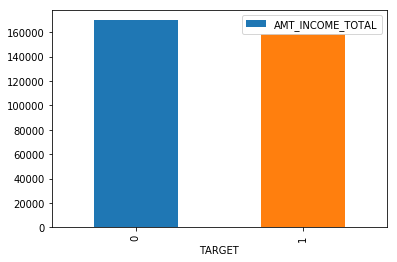

In [147]:
my_plot = income_by_target.plot(x="TARGET", y="AMT_INCOME_TOTAL",kind="bar")

`.hist()` specifically creates histogram plots

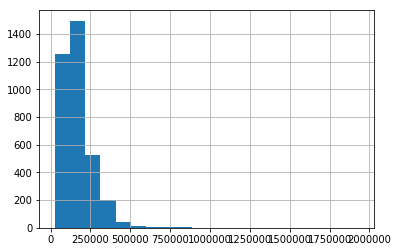

In [148]:
my_plot = app_data["AMT_INCOME_TOTAL"].hist(bins=20)

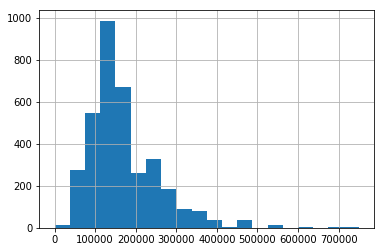

In [149]:
# set up range(tuple or None, optional)
my_plot = app_data["AMT_INCOME_TOTAL"].hist(range=(0,750000), bins=20)